# Credit Card Approval Use Case

- In machine learning, a use case helps describe how a model is applied to solve a real-world problem—from data collection to prediction and deployment.

## Use Case Structure
- A typical use case includes:

    1. Use Case Name → The title of the use case
    2. Actors → The people or systems interacting with the model
    3. Goal → What the system aims to achieve
    4. Preconditions → What needs to be in place before the process starts
    5. Steps → The sequence of actions performed in the process
    6. Alternate Scenarios → What happens if something goes wrong
    7. Postconditions → The expected outcome after the use case completes
 
### Example: Use Case for Credit Card Approval Model
1. Use Case Name
- Automated Credit Card Approval System


2. Actors
-   Applicant → A person applying for a credit card
-   Machine Learning Model → Predicts approval or rejection
-   Bank System → Collects applications, stores data, and integrates the model

3. Goal
- To automatically approve or reject credit card applications based on applicants' financial data and credit history.
  
4. Preconditions

    - Applicant provides necessary information (income, credit score, job status, etc.).
    - Historical data is available for training the machine learning model.

5. Steps (When Everything Works Fine)

    - Applicant submits a credit card application.
    - The bank system validates and preprocesses the data.
    - The machine learning model predicts Approval (1) or Rejection (0).
    - If approved, the applicant receives a confirmation email.
    - If rejected, the applicant receives a rejection message with possible reasons.

6. Alternate Scenarios (Edge Cases)

    - Missing Data → System prompts the user to complete the form.
    - Unclear Decision → Application is sent for manual review.
    - Fraudulent Data → The system flags it for investigation.

7. Postconditions (Expected Outcome)

    - The applicant is notified of their approval/rejection status.
    - The bank updates its database with the decision.

# ---------- UNDERSTANDING THE BUSINESS PROBLEM ----------

### Credit card companies need to decide who to approve for credit cards
#### Benefits of using machine learning for credit card approval:
 1. Faster decisions - automated systems can process applications in seconds
 2. Consistency - all applications are evaluated using the same criteria
 3. Accuracy - ML can find patterns humans might miss
- A good model helps banks:
  - Approve more creditworthy customers (increasing revenue)
  - Reject high-risk applicants (reducing losses from defaults)

In [299]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier # Classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [300]:
column_names = [
    'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
    'A11', 'A12', 'A13', 'A14', 'A15', 'Target'
]

In [301]:
df = pd.read_csv('crx.data', names=column_names,  na_values='?') # https://archive.ics.uci.edu/dataset/27/credit+approval

In [302]:
df

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,Target
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,260.0,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,200.0,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,200.0,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,280.0,750,-


In [303]:
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,Target
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+


In [304]:
df.shape

(690, 16)

In [305]:
df.tail()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,Target
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,260.0,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,200.0,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,200.0,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,280.0,750,-
689,b,35.00,3.375,u,g,c,h,8.29,f,f,0,t,g,0.0,0,-


In [306]:
df.sample(10)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,Target
545,b,44.25,11.000,y,p,d,v,1.500,t,f,0,f,s,0.0,0,-
574,a,20.33,10.000,u,g,c,h,1.000,t,t,4,f,g,50.0,1465,+
540,b,19.42,1.500,y,p,cc,v,2.000,t,f,0,t,g,100.0,20,-
367,b,39.42,1.710,y,p,m,v,0.165,f,f,0,f,s,400.0,0,-
581,b,41.00,0.040,u,g,e,v,0.040,f,t,1,f,s,560.0,0,+
118,b,57.83,7.040,u,g,m,v,14.000,t,t,6,t,g,360.0,1332,+
606,b,16.17,0.040,u,g,c,v,0.040,f,f,0,f,g,0.0,0,+
645,b,37.33,2.665,u,g,cc,v,0.165,f,f,0,t,g,0.0,501,-
424,b,33.67,2.165,u,g,c,v,1.500,f,f,0,f,p,120.0,0,-
460,a,24.50,2.415,y,p,c,v,0.000,f,f,0,f,g,120.0,0,-


In [307]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      678 non-null    object 
 1   A2      678 non-null    float64
 2   A3      690 non-null    float64
 3   A4      684 non-null    object 
 4   A5      684 non-null    object 
 5   A6      681 non-null    object 
 6   A7      681 non-null    object 
 7   A8      690 non-null    float64
 8   A9      690 non-null    object 
 9   A10     690 non-null    object 
 10  A11     690 non-null    int64  
 11  A12     690 non-null    object 
 12  A13     690 non-null    object 
 13  A14     677 non-null    float64
 14  A15     690 non-null    int64  
 15  Target  690 non-null    object 
dtypes: float64(4), int64(2), object(10)
memory usage: 86.4+ KB


In [308]:
df['A1'].unique()

array(['b', 'a', nan], dtype=object)

In [309]:
df['A1'].value_counts()

A1
b    468
a    210
Name: count, dtype: int64

In [310]:
missing_percent = (df.isnull().sum() / len(df)) * 100

missing_percent[missing_percent > 0]

A1     1.739130
A2     1.739130
A4     0.869565
A5     0.869565
A6     1.304348
A7     1.304348
A14    1.884058
dtype: float64

In [311]:
df.isnull().sum()

A1        12
A2        12
A3         0
A4         6
A5         6
A6         9
A7         9
A8         0
A9         0
A10        0
A11        0
A12        0
A13        0
A14       13
A15        0
Target     0
dtype: int64

In [312]:
df['A1'].mode()

0    b
Name: A1, dtype: object

In [313]:
df['A1'].mode()[0]

'b'

In [314]:
df['A1'] = df['A1'].fillna(df['A1'].mode()[0])

# df['A1'].fillna(df['A1'].mode(), inplace=True)

In [315]:
df.isnull().sum()

A1         0
A2        12
A3         0
A4         6
A5         6
A6         9
A7         9
A8         0
A9         0
A10        0
A11        0
A12        0
A13        0
A14       13
A15        0
Target     0
dtype: int64

In [316]:
df['A2'] = df['A2'].fillna(df['A2'].median())
df['A14'] = df['A14'].fillna(df['A2'].mean())

In [317]:
df.isnull().sum()

A1        0
A2        0
A3        0
A4        6
A5        6
A6        9
A7        9
A8        0
A9        0
A10       0
A11       0
A12       0
A13       0
A14       0
A15       0
Target    0
dtype: int64

In [318]:
# Fill missing values with the median
num_columns = ['A2', 'A14']
imputer = SimpleImputer(strategy='median')
df[num_columns] = imputer.fit_transform(df[num_columns])

In [319]:
df.isnull().sum()

A1        0
A2        0
A3        0
A4        6
A5        6
A6        9
A7        9
A8        0
A9        0
A10       0
A11       0
A12       0
A13       0
A14       0
A15       0
Target    0
dtype: int64

In [320]:
# HomeWork


In [321]:
# for col in df.columns:
#     print(f"Unique values in {col}:")
#     print(df[col].unique())

In [322]:
# df = pd.read_csv('data.crx', na_values=['?', 'NA', 'N/A', '-', ' '])
# df.replace(['?', 'NA', 'N/A', '-', ' '], np.nan)
# df.replace(r'^\s*$', np.nan, regex=True, inplace=True)

In [323]:
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,Target
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+


In [324]:
cat_cols = ['A1', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10', 'A12', 'A13']
df[cat_cols] = df[cat_cols].astype(str) # type casting 

In [325]:
cat_cols = df.select_dtypes(include='object').columns.tolist()
df[cat_cols] = df[cat_cols].astype(str) 

In [326]:
label_encoder = LabelEncoder()
for col in cat_cols:
    df[col] = label_encoder.fit_transform(df[col])

In [327]:
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,Target
0,1,30.83,0.000,2,0,13,8,1.25,1,1,1,0,0,202.0,0,0
1,0,58.67,4.460,2,0,11,3,3.04,1,1,6,0,0,43.0,560,0
2,0,24.50,0.500,2,0,11,3,1.50,1,0,0,0,0,280.0,824,0
3,1,27.83,1.540,2,0,13,8,3.75,1,1,5,1,0,100.0,3,0
4,1,20.17,5.625,2,0,13,8,1.71,1,0,0,0,2,120.0,0,0


In [328]:
# 1 or 1.0

In [329]:
#  1 column is in your foot and the 2nd column is inches. 1 foot = 12 inches
num_cols = df.select_dtypes(include='float').columns.tolist()

scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

In [330]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      690 non-null    int64  
 1   A2      690 non-null    float64
 2   A3      690 non-null    float64
 3   A4      690 non-null    int64  
 4   A5      690 non-null    int64  
 5   A6      690 non-null    int64  
 6   A7      690 non-null    int64  
 7   A8      690 non-null    float64
 8   A9      690 non-null    int64  
 9   A10     690 non-null    int64  
 10  A11     690 non-null    int64  
 11  A12     690 non-null    int64  
 12  A13     690 non-null    int64  
 13  A14     690 non-null    float64
 14  A15     690 non-null    int64  
 15  Target  690 non-null    int64  
dtypes: float64(4), int64(12)
memory usage: 86.4 KB


In [331]:
df[num_cols]

,A2,A3,A8,A14
0,-0.057723,-0.956613,-0.291083,0.120375
1,2.291317,-0.060051,0.244190,-0.797218
2,-0.591826,-0.856102,-0.216324,0.570514
3,-0.310853,-0.647038,0.456505,-0.468270
4,-0.957176,0.174141,-0.153526,-0.352850
...,...,...,...,...
685,-0.880394,1.070704,-0.291083,0.455094
686,-0.746235,-0.805846,-0.066806,0.108832
687,-0.528544,1.757198,-0.066806,0.108832
688,-1.147023,-0.915403,-0.652915,0.570514


In [332]:
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,Target
0,1,-0.057723,-0.956613,2,0,13,8,-0.291083,1,1,1,0,0,0.120375,0,0
1,0,2.291317,-0.060051,2,0,11,3,0.244190,1,1,6,0,0,-0.797218,560,0
2,0,-0.591826,-0.856102,2,0,11,3,-0.216324,1,0,0,0,0,0.570514,824,0
3,1,-0.310853,-0.647038,2,0,13,8,0.456505,1,1,5,1,0,-0.468270,3,0
4,1,-0.957176,0.174141,2,0,13,8,-0.153526,1,0,0,0,2,-0.352850,0,0


In [333]:
X = df.drop(columns=['Target'])
y = df['Target']

In [334]:
X.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15
0,1,-0.057723,-0.956613,2,0,13,8,-0.291083,1,1,1,0,0,0.120375,0
1,0,2.291317,-0.060051,2,0,11,3,0.244190,1,1,6,0,0,-0.797218,560
2,0,-0.591826,-0.856102,2,0,11,3,-0.216324,1,0,0,0,0,0.570514,824
3,1,-0.310853,-0.647038,2,0,13,8,0.456505,1,1,5,1,0,-0.468270,3
4,1,-0.957176,0.174141,2,0,13,8,-0.153526,1,0,0,0,2,-0.352850,0


In [335]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Target, dtype: int64

In [336]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

In [337]:
X_train.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15
140,0,-0.022285,-0.202777,2,0,2,3,-0.477980,1,1,9,1,0,-0.000817,0
427,1,0.505068,-0.788759,2,0,4,8,-0.652915,0,0,0,0,0,-0.352850,5
633,1,0.076435,-0.521398,3,3,8,2,-0.664877,0,0,0,0,0,-0.352850,0
621,1,-0.746235,-0.923444,2,0,1,4,0.007953,0,0,0,1,2,-1.045372,0
143,1,-0.774923,1.254640,2,0,13,8,-0.066806,1,1,1,0,0,-0.583690,278


In [338]:
X_test

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15
14,0,1.207924,1.154129,2,0,11,8,0.830300,1,1,7,1,0,-1.045372,0
600,0,-0.169944,-0.864143,2,0,8,8,-0.503398,1,1,4,0,0,1.147617,500
435,1,-1.055897,-0.956613,3,3,5,2,-0.664877,0,1,4,0,0,-0.785676,1
491,1,-0.619670,-0.780718,2,0,11,8,0.718161,1,1,2,1,0,1.955560,2000
324,1,0.181906,-0.705334,2,0,13,8,-0.316501,0,0,0,0,0,-0.352850,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,1,0.990232,-0.353544,2,0,11,3,1.129335,1,1,11,0,0,-0.583690,0
175,1,-0.380885,-0.655079,3,3,13,8,-0.552738,1,0,0,1,0,0.455094,1065
91,1,-0.007941,2.159244,2,0,1,8,-0.515359,1,0,0,0,0,-0.352850,0
433,1,-0.528544,-0.755590,2,0,0,8,-0.515359,0,0,0,0,0,0.108832,0


In [339]:
df[14:15]

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,Target
14,0,1.207924,1.154129,2,0,11,8,0.8303,1,1,7,1,0,-1.045372,0,0


In [340]:
### Training a model

In [341]:
# rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
# rf_model.fit(X_train, y_train)

In [426]:
logit_reg = LogisticRegression(max_iter=2000)

logit_reg.fit(X_train, y_train)

LogisticRegression(max_iter=2000)

In [428]:
y_pred = logit_reg.predict(X_test)

y_pred

array([0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0])

### Evaluation the model

In [431]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8623188405797102

In [408]:
# Classification Report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.73      0.81        64
           1       0.80      0.93      0.86        74

    accuracy                           0.84       138
   macro avg       0.85      0.83      0.84       138
weighted avg       0.85      0.84      0.84       138



In [410]:
# #Confusion Matrix

# sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cbar=False, xticklabels=['Rejected', 'Approved'], yticklabels=['Rejected', 'Approved']);
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.title('Confusion Matrix')

In [412]:
confusion_mat = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])

confusion_mat

Predicted,0,1
Actual,,
0,47,17
1,5,69


In [414]:
y_test.value_counts()

Target
1    74
0    64
Name: count, dtype: int64

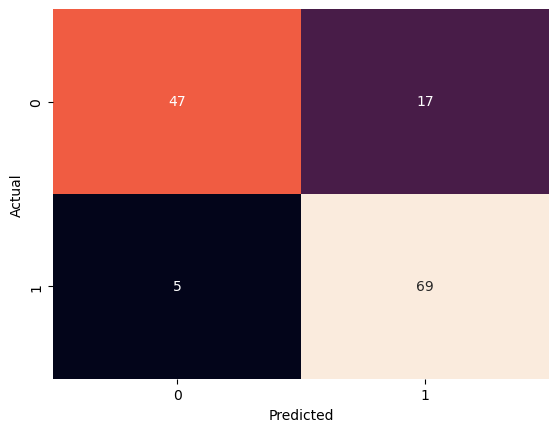

In [416]:
sns.heatmap(confusion_mat, annot=True, fmt='.10g', cbar=False);